In [1]:
from main import Classify
import numpy as np
from numpy import dot
from numpy.linalg import norm
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing, svm
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from scipy import spatial
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
task = Classify(top = 100)
task.get_top_result()
task.get_realized(True)
task.get_unrealized(True)
task.do_normalize(onehot=True)
task.generate_learning()

Adding realized gain/loss into Dataframe.
Adding unrealized gain/loss into Dataframe.


In [3]:
dataset = task.df_learning.drop(columns=['merge_key', 'fund_id', 'id_number', 'yyyymm', 'chinese_name', 'certificate'])
# dataset = dataset[['invest_type', 'fund_type','KPI', 'is_recommend', 'KPI']]
if task.onehot == False:
    dataset.drop(columns=['AUM', 'region', 'count_currency'], inplace=True)
y = dataset['is_recommend']
x = dataset.drop(columns=['is_recommend'])
pca = PCA(n_components=2, svd_solver='randomized')
x_pca = pca.fit_transform(x)
x.columns

Index(['local_total', 'foreign_total', 'invest_type', 'age',
       'monthly_trade_vol', 'stock_inventory_val', 'KPI', 'fund_type',
       'local_or_foreign', 'chosen', 'guaranteed', 'realized_gain/loss',
       'unrealized_gain/loss', 'AUM_B', 'AUM_E', 'AUM_F', 'AUM_FT', 'AUM_I',
       'AUM_M', 'AUM_O', 'AUM_W', 'region_AU  ', 'region_BR  ', 'region_CA  ',
       'region_CH  ', 'region_CN  ', 'region_DE  ', 'region_FR  ',
       'region_GB  ', 'region_HK  ', 'region_ID  ', 'region_IE  ',
       'region_IN  ', 'region_IT  ', 'region_JP  ', 'region_KR  ',
       'region_LU  ', 'region_MY  ', 'region_PH  ', 'region_RU  ',
       'region_SG  ', 'region_TH  ', 'region_TW  ', 'region_US  ',
       'region_ZA  ', 'count_currency_AUD', 'count_currency_CAD',
       'count_currency_CHF', 'count_currency_CNY', 'count_currency_EUR',
       'count_currency_GBP', 'count_currency_HKD', 'count_currency_JPY',
       'count_currency_NZD', 'count_currency_SGD', 'count_currency_TWD',
       'count_curre

In [4]:
x_pca_arr = np.array(x_pca)
x_pca_arr[:,0]
y_arr = np.array(y)
true= np.where(y==1)
false = np.where(y==0)
x_true = x_pca_arr[true]
x_false = x_pca_arr[false]
print(len(x_true))
print()
print(len(x_false))

# print(len(y))
# y[true]

21567

9069764


In [5]:
# np.random.seed(42)
# N = 1000
# A1 = np.random.multivariate_normal(mean=[1,-4], cov=[[2,-1], [-1, 2]], size=N)
# A2 = np.random.multivariate_normal(mean=[1,-3], cov=[[1,1.5], [1.5, 3]], size=N)


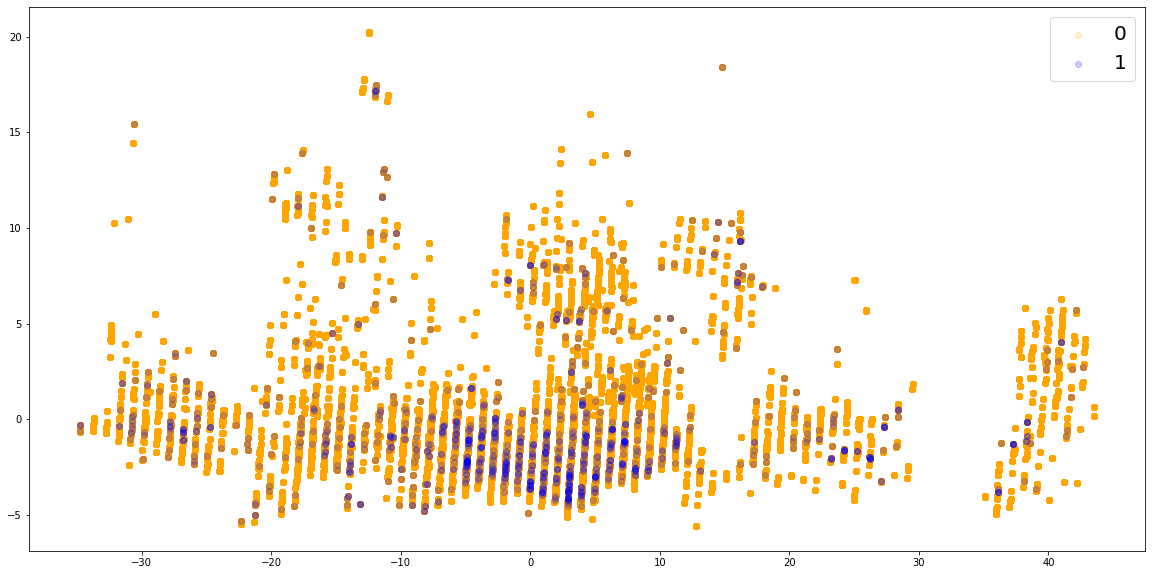

In [6]:
A1 = x_true[np.random.choice(len(x_true), size=1000, replace=False)]
A2 = x_false
fig, ax = plt.subplots(figsize=(20,10))
s1 = ax.scatter(A2[:,0], A2[:,1], color="orange", alpha=0.2)
s2 = ax.scatter(A1[:,0], A1[:,1], color="blue", alpha=0.2)
ax.legend((s1, s2), (0,1), loc='upper right', prop={'size':20})

In [7]:
y2 = dataset['is_recommend']
x2 = dataset.drop(columns=['is_recommend'])
oversample = SMOTE()
x2, y2 = oversample.fit_resample(x2, y2)
pca2 = PCA(n_components=2, svd_solver='full')
x2_pca = pca2.fit_transform(x2)
x2_pca_arr = np.array(x2_pca)
x2_pca_arr[:,0]
y2_arr = np.array(y)
true = np.where(y2==1)
false = np.where(y2==0)
x2_true = x2_pca_arr[true]
x2_false = x2_pca_arr[false]

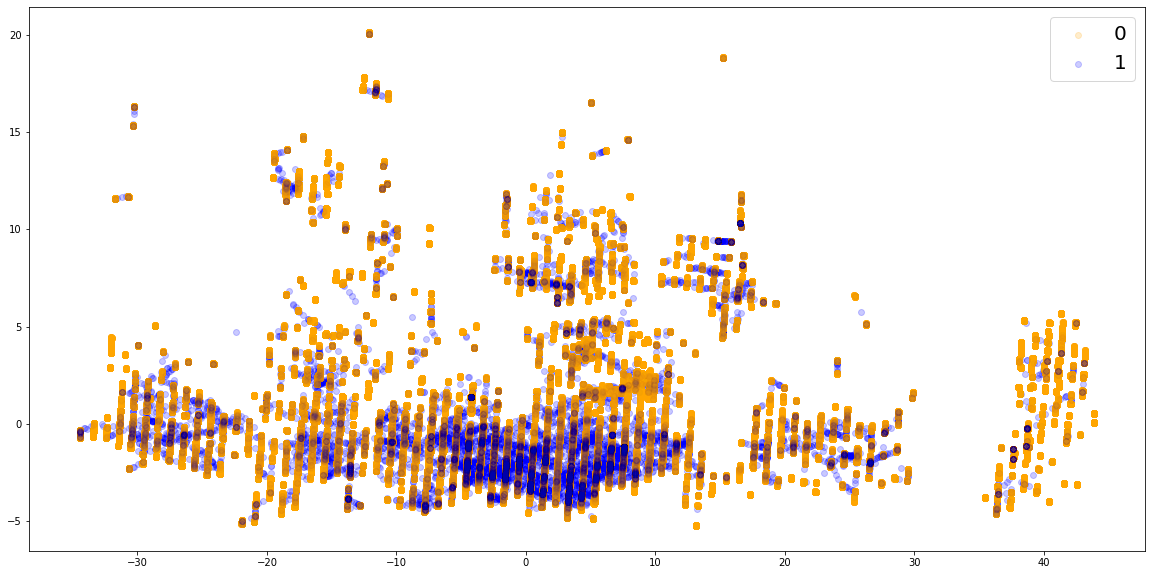

In [9]:
A1 = x2_true[np.random.choice(len(x2_true), size=30000, replace=False)]
A2 = x2_false
fig, ax = plt.subplots(figsize=(20,10))

s2 = ax.scatter(A1[:,0], A1[:,1], color="blue", alpha=0.2)
s1 = ax.scatter(A2[:,0], A2[:,1], color="orange", alpha=0.2)
s3 = ax.scatter(A1[:,0], A1[:,1], color="blue", alpha=0.01)
ax.legend((s1, s2), (0,1), loc='upper right', prop={'size':20})